## Проект e-commerce
#### Выполнил: Сафронский Вячеслав
Продакт-менеджер Василий попросил вас проанализировать совершенные покупки и ответить на ряд вопросов.

In [1]:
import pandas as pd
from datetime import timedelta
import operator as op
import seaborn as sns
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'svg'")
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['image.cmap'] = 'viridis'

In [2]:
# Читаем датасеты. Датасеты orders_dataset и order_items_dataset имеют колонки с датами, при чтении имеют тип object.
# При чтении данных датасетов используется параметр parce_dates,
# для перевода временных колонок к соответствующему типу datetime64[ns] 

In [3]:
customers_dataset = pd.read_csv('C:/Users/user/study/first_project/olist_customers_dataset.csv')
orders_dataset = pd.read_csv('C:/Users/user/study/first_project/olist_orders_dataset.csv', parse_dates = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])
order_items_dataset = pd.read_csv('C:/Users/user/study/first_project/olist_order_items_dataset.csv', parse_dates = ['shipping_limit_date'])

In [4]:
# Смотрим на данные датафрейма customers_dataset
customers_dataset.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# Убеждаемся, что отсутствуют выбросы, пропуски, видим, что все типы данных считаны корректно.
# Повторяем процедуру для всех датафреймов перед началом работы.
customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
orders_dataset.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [7]:
orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [8]:
# Видим, что в датафрейме orders_dataset есть пропущенные значения во временных столбцах.
# Так как в стобце order_purchase_timestamp пропцщенных значений нет, пропущенные значения в других стобцах
# возможно интерпретировать аналитически, считая, что либо не поступила оплата, либо заказ еще не был доставлен.
# Наличие пропущенных значений будет учтено при выполнении дальнейших задач.
orders_dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [9]:
order_items_dataset.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
# Для временных колонок применен параметр parse_dates при чтении датафрейма, для транформации типа в datetime64[ns].
order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [11]:
order_items_dataset.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

### Задание 1. Сколько у нас пользователей, которые совершили покупку только один раз?
Для выполнения задания датасеты customers_dataset и orders_dataset объединяются через merge в датасет customers_orders_merged по столбцу customer_id.

Для выполнения заданий принято, что покупка совершена, <u>**если подтвержден факт оплаты заказа в колонке order_approved_at**<u>.

In [12]:
customers_orders_merged = orders_dataset.merge(customers_dataset, on = 'customer_id')

In [13]:
customers_orders_merged.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [14]:
# Определяем количество столбцов
customers_orders_merged.shape[0]

99441

In [15]:
# Проверяем, все ли значения заказов уникальны 
customers_orders_merged.order_id.nunique()

99441

In [16]:
only_one_purchase_customers = customers_orders_merged.loc[~customers_orders_merged.order_approved_at.isna()] \
                                                     .groupby('customer_unique_id', as_index = False) \
                                                     .agg({'order_id' : 'count'}) \
                                                     .rename(columns = {'order_id' : 'orders_quantity'}) \
                                                     .query('orders_quantity == 1') \
                                                     .shape[0]

# 1. фильтрация датафрейма - берем только данные с ненулевыми значениями в стоблце order_approved_at
# 2. группировка по уникальным пользователям
# 3. аггрегация по количеству заказов
# 4. изменение названия колонки
# 5. фильтрация по количеству заказов, согласно условиям задачи
# 6. получение количества пользователей (строк)
only_one_purchase_customers

93049

#### Ответ на Задание 1 - только один раз покупку совершили <u>93049</u> пользователей 


### Задание 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?
Изучены данные. Сделано предположение, что недоставленными являются заказы, для которых отcустствует значение в столбце order_delivered_customer_date.
Однако даже для отсутствующих значений столбца order_delivered_customer_date в столбце order_status есть значения delivered.

Сделано предположение, что заказы были доставлены после предполагаемого срока. Однако при анализе данных видно, что даже при опоздании в графе order_delivered_customer_date указана дата доставки.

На основании вышеперечисленного, принято, что недоставленными считаются те заказы, для которых значение в колонке order_status == canceled и unavailable ( непосредственный факт отмены / невозможность доставки).

In [17]:
# создаём датафрейм с двумя колонками - order_estimated_delivery_date и order_status
# и фильтруем его по "order_status == 'canceled' or order_status == 'unavailable'".
not_delivered_orders = customers_orders_merged[['order_estimated_delivery_date', 'order_status']]\
                                              .query("order_status == 'canceled' or order_status == 'unavailable'")\
                                              .sort_values('order_estimated_delivery_date')

In [18]:
not_delivered_orders.head(5)

,order_estimated_delivery_date,order_status
10071,2016-09-30,canceled
53688,2016-10-24,canceled
83078,2016-10-25,canceled
4396,2016-10-28,canceled
30150,2016-11-14,canceled


In [19]:
not_delivered_orders.shape

(1234, 2)

In [20]:
# переводим значение даты к виду Y-M
not_delivered_orders['order_estimated_delivery_date'] = not_delivered_orders.order_estimated_delivery_date.dt.to_period('M')

In [21]:
not_delivered_orders.head()

,order_estimated_delivery_date,order_status
10071,2016-09,canceled
53688,2016-10,canceled
83078,2016-10,canceled
4396,2016-10,canceled
30150,2016-11,canceled


In [22]:
#определяем общее среднее месячное значение товаров, которые не были доставлены
general_monthly_mean = not_delivered_orders.groupby('order_estimated_delivery_date')\
                                           .agg({'order_status' : 'count'})\
                                           .order_status.mean()
round(general_monthly_mean, 2)

47.46

In [23]:
# делаем группировку по order_estimated_delivery_date и order_status, аггрегация по количеству строк.
not_delivered_by_categories = (not_delivered_orders.groupby(['order_estimated_delivery_date', 'order_status']) \
                         .agg({'order_status' : 'count'}) \
                         .rename(columns={'order_status' : 'times_not_delivered'}))\
                         .reset_index()\
                         .pivot(index ='order_estimated_delivery_date', columns ='order_status', values = 'times_not_delivered')\
                         .fillna(0)

In [24]:
not_delivered_by_categories

order_status,canceled,unavailable
order_estimated_delivery_date,,
2016-09,1.0,0.0
2016-10,3.0,0.0
2016-11,14.0,5.0
2016-12,8.0,2.0
2017-02,2.0,2.0
2017-03,26.0,66.0
2017-04,22.0,19.0
2017-05,23.0,16.0
2017-06,29.0,29.0


<AxesSubplot:xlabel='order_estimated_delivery_date'>

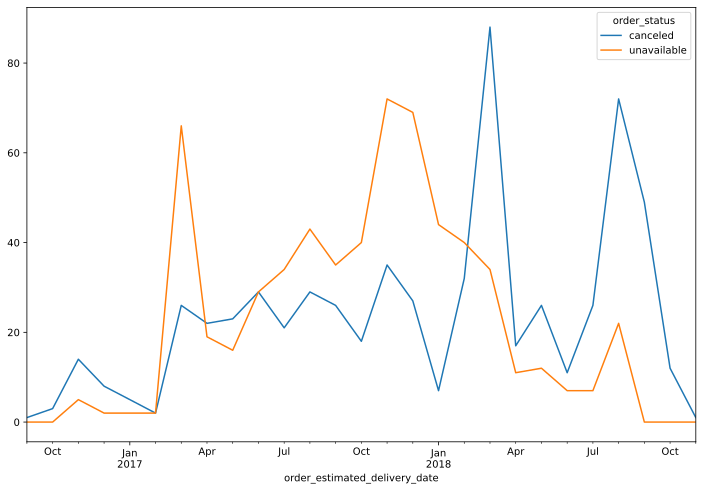

In [25]:
not_delivered_by_categories.plot.line(figsize=(12,8))

In [26]:
# определяем среднее месячное значение для каждой категории
mean_by_categories = not_delivered_by_categories.mean().round(2)

In [27]:
mean_by_categories

order_status
canceled       24.04
unavailable    23.42
dtype: float64

In [28]:
# проверяем сумму
mean_by_categories.sum().round(2)

47.46

#### Ответ на Задание 2 - В месяц в среднем не доставляется 47.46 заказов. Из них 24.04 по причине cancelled, 23.42 по причине unavailable.

### ЗАДАНИЕ 3 По каждому товару определить, в какой день недели товар чаще всего покупается. 

In [29]:
# объединяем датасеты orders_dataset и order_items_dataset
orders_and_items_merged = orders_dataset.merge(order_items_dataset, on = 'order_id')

In [30]:
orders_and_items_merged.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [31]:
# количество уникальных продуктов
orders_and_items_merged.product_id.nunique()

32951

In [32]:
# создаем датафрейм с колонками order_approved_at и product_id
products_purchase_dates = orders_and_items_merged.loc[~orders_and_items_merged.order_approved_at.isna()][['order_approved_at', 'product_id']]

In [33]:
products_purchase_dates.head(5)

,order_approved_at,product_id
0,2017-10-02 11:07:15,87285b34884572647811a353c7ac498a
1,2018-07-26 03:24:27,595fac2a385ac33a80bd5114aec74eb8
2,2018-08-08 08:55:23,aa4383b373c6aca5d8797843e5594415
3,2017-11-18 19:45:59,d0b61bfb1de832b15ba9d266ca96e5b0
4,2018-02-13 22:20:29,65266b2da20d04dbe00c5c2d3bb7859e


In [34]:
# изменяем значения временного столбца на названия дней недели и переименовываем столбец в weekday
products_purchase_dates['order_approved_at'] = products_purchase_dates['order_approved_at'].dt.day_name()
products_purchase_dates = products_purchase_dates.rename(columns={'order_approved_at' : 'weekday'})

In [35]:
products_purchase_dates

,weekday,product_id
0,Monday,87285b34884572647811a353c7ac498a
1,Thursday,595fac2a385ac33a80bd5114aec74eb8
2,Wednesday,aa4383b373c6aca5d8797843e5594415
3,Saturday,d0b61bfb1de832b15ba9d266ca96e5b0
4,Tuesday,65266b2da20d04dbe00c5c2d3bb7859e
...,...,...
112645,Tuesday,f1d4ce8c6dd66c47bbaa8c6781c2a923
112646,Sunday,b80910977a37536adeddd63663f916ad
112647,Monday,d1c427060a0f73f6b889a5c7c61f2ac4
112648,Monday,d1c427060a0f73f6b889a5c7c61f2ac4


In [36]:
# группируем по product_id и weekday, получаем количество дней. 
# Затем группируем по product_id через .max(), получаем для каждого товара день недели когда товар чаще всего покупали.
best_weekday = products_purchase_dates.groupby(['product_id', 'weekday'])\
                                      .agg({'weekday' : 'count'})\
                                      .rename(columns={'weekday' : 'quantity'})\
                                      .reset_index()\
                                      .groupby('product_id', as_index = False)\
                                      .max()

In [37]:
# Ответ на задание - датафрейм best_weekday, с указанием, в какой день недели товар чаще всего покупается. 
best_weekday

,product_id,weekday,quantity
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Friday,1
3,000b8f95fcb9e0096488278317764d19,Wednesday,1
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday,1
...,...,...,...
32943,fff6177642830a9a94a0f2cba5e476d1,Saturday,1
32944,fff81cc3158d2725c0655ab9ba0f712c,Monday,1
32945,fff9553ac224cec9d15d49f5a263411f,Saturday,1
32946,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,3


### ЗАДАНИЕ 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?
Не стоит забывать, что внутри месяца может быть не целое количество недель.
Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [38]:
# создаем датафрейм с колонками данных о id пользователей и датами совершения покупки.
customers_purchases =  customers_orders_merged.loc[~customers_orders_merged.order_approved_at.isna()]\
                                              [['customer_unique_id', 'order_approved_at']]\
                                              .sort_values('order_approved_at')

In [39]:
customers_purchases.head()

,customer_unique_id,order_approved_at
30710,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38
64058,14359ea0c7a105749c0a56478825b015,2016-10-04 09:43:32
92636,b8b8726af116a5cfb35b0315ecef9172,2016-10-04 10:18:57
6747,87776adb449c551e74c13fc34f036105,2016-10-04 10:19:23
67037,88bc832f104b6dd684a17dbb1b76e778,2016-10-04 10:25:46


In [40]:
# преобразуем колонку order_approved_at к виду Y-M
customers_purchases['order_approved_at'] = (customers_purchases.order_approved_at.dt.to_period('M'))

In [41]:
# переименовываем колонку order_approved_at в year_month
customers_purchases = customers_purchases.rename(columns={'order_approved_at':'year_month'})

In [42]:
# группируем датасет по пользователям и месяцам, получаем количество покупок совершенных пользователем в каждый месяц.
customers_purchases_count = customers_purchases.groupby(['customer_unique_id', 'year_month'])\
                                               .agg({'customer_unique_id' : 'count'})\
                                               .rename(columns={'customer_unique_id' : 'count'})\
                                               .reset_index()\
                                               .sort_values('year_month')

In [43]:
# создаем колонку с количеством недель для каждого месяца
customers_purchases_count['number_of_weeks_in_month'] = (customers_purchases_count['year_month'].dt.days_in_month)/7

In [44]:
# создаем колонку с требуемой в задании метрикой - делим количество покупок в месяц на количество недель.
customers_purchases_count['weekly_mean_by_month'] = customers_purchases_count['count'] / customers_purchases_count['number_of_weeks_in_month']

In [45]:
# ответом на задание является датафрейм customers_purchases_count с указанием
# среднего количества покупок в неделю для каждого пользователя
customers_purchases_count.head(5)

,customer_unique_id,year_month,count,number_of_weeks_in_month,weekly_mean_by_month
50245,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,1,4.285714,0.233333
4203,0acb54b64345b37d81205175f3f3e779,2016-10,1,4.428571,0.225806
7799,14359ea0c7a105749c0a56478825b015,2016-10,1,4.428571,0.225806
50293,8329519e31cb1b89bd44c3c6ae417ad6,2016-10,1,4.428571,0.225806
25068,415ee7f7e65b172382f321e711057114,2016-10,1,4.428571,0.225806


In [46]:
# альтернативно рассчитана метрика, без учета деления на года.
customers_purchases_1 =  customers_orders_merged[['customer_unique_id', 'order_approved_at']]\
                                                .sort_values('order_approved_at')
customers_purchases_1['number_of_weeks_in_month'] = (customers_purchases_1['order_approved_at'].dt.days_in_month)/7
customers_purchases_1['order_approved_at'] = (customers_purchases_1.order_approved_at.dt.month)
customers_purchases_1 = customers_purchases_1.rename(columns={'order_approved_at':'month'})
customers_purchases_count_1 = customers_purchases_1.groupby(['customer_unique_id', 'month', 'number_of_weeks_in_month'])\
                                                .agg({'customer_unique_id' : 'count'})\
                                                .rename(columns={'customer_unique_id' : 'count'})\
                                                .reset_index()\
                                                .sort_values('month')
customers_purchases_count_1['weekly_mean_by_month'] = customers_purchases_count_1['count'] / customers_purchases_count_1['number_of_weeks_in_month']

In [47]:
customers_purchases_count_1.head(5)

,customer_unique_id,month,number_of_weeks_in_month,count,weekly_mean_by_month
58362,98883b9e1d9d9c46c298c69146db811a,1.0,4.428571,1,0.225806
19050,31ae77543b4607be85072a5aa23e19ca,1.0,4.428571,1,0.225806
19044,31a98cf218b88e127990ae3ded21211f,1.0,4.428571,1,0.225806
45640,773d6a126278eaa169f2daeb9cc23ef9,1.0,4.428571,1,0.225806
71891,bbd5c31d63e1b664fb68b21175fec0e9,1.0,4.428571,1,0.225806


### ЗАДАНИЕ 5. Используя pandas, проведи когортный анализ пользователей.
В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц

In [48]:
# составляем функцию для определения когорт
def get_cohorts(df, period='M'):
    df = df[['customer_unique_id','order_id','order_purchase_timestamp']].drop_duplicates()
    df = df.assign(acquisition_cohort = df.groupby('customer_unique_id')\
                   ['order_purchase_timestamp'].transform('min').dt.to_period(period))
    df = df.assign(order_cohort = df['order_purchase_timestamp'].dt.to_period(period))
    return df

In [49]:
# через функцию get_cohorts создаем датафрейм с когортами
df = get_cohorts(customers_orders_merged.loc[~customers_orders_merged.order_approved_at.isna()], period='M')

In [50]:
df.head()

,customer_unique_id,order_id,order_purchase_timestamp,acquisition_cohort,order_cohort
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-09,2017-10
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08,2018-08
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02,2018-02


In [51]:
# создаем функцию для расчета retention
def get_retention(df, period='M'):
    df = get_cohorts(df, period).groupby(['acquisition_cohort', 'order_cohort'])\
                                .agg(customers=('customer_unique_id', 'nunique')) \
                                .reset_index(drop=False)
    df['periods'] = (df.order_cohort - df.acquisition_cohort)\
    .apply(op.attrgetter('n'))

    return df

In [52]:
# через функцию get_retention создаем датафрейм с retention
retention = get_retention(df)

In [53]:
retention.head()

,acquisition_cohort,order_cohort,customers,periods
0,2016-09,2016-09,4,0
1,2016-10,2016-10,315,0
2,2016-10,2017-04,1,6
3,2016-10,2017-07,1,9
4,2016-10,2017-09,1,11


In [54]:
# создаем функцию для составления матрицы
def get_cohort_matrix(df, period='M', percentage=False):
    df = get_retention(df, period).pivot_table(index = 'acquisition_cohort',
                                               columns = 'periods',
                                               values = 'customers')
    
    if percentage:
        df = df.divide(df.iloc[:,0], axis=0)*100
    
    return df

In [55]:
# через функцию get_cohort_matrix создаем матрицу
df_matrix = get_cohort_matrix(df, 'M', percentage=True)

In [56]:
df_matrix

periods,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
acquisition_cohort,,,,,,,,,,,,,,,,,,,,
2016-09,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,100.0,NaN,NaN,NaN,NaN,NaN,0.317460,NaN,NaN,0.317460,NaN,0.317460,NaN,0.317460,NaN,0.317460,NaN,0.317460,0.634921,0.634921
2016-12,100.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,100.0,0.393701,0.262467,0.131234,0.393701,0.131234,0.524934,0.131234,0.131234,NaN,0.393701,0.131234,0.787402,0.393701,0.131234,0.131234,0.262467,0.393701,0.131234,NaN
2017-02,100.0,0.230150,0.287687,0.115075,0.402762,0.115075,0.230150,0.172612,0.115075,0.230150,0.115075,0.287687,0.172612,0.172612,0.115075,0.057537,0.057537,0.230150,NaN,NaN
2017-03,100.0,0.493546,0.341686,0.379651,0.341686,0.151860,0.151860,0.303721,0.341686,0.075930,0.379651,0.151860,0.227790,0.113895,0.151860,0.227790,0.075930,0.151860,NaN,NaN
2017-04,100.0,0.596252,0.212947,0.170358,0.340716,0.255537,0.340716,0.298126,0.298126,0.170358,0.255537,0.085179,0.085179,0.042589,0.085179,0.085179,0.212947,NaN,NaN,NaN
2017-05,100.0,0.473538,0.501393,0.389972,0.306407,0.334262,0.417827,0.167131,0.250696,0.306407,0.250696,0.334262,0.250696,0.027855,0.194986,0.250696,NaN,NaN,NaN,NaN
2017-06,100.0,0.478011,0.350542,0.414277,0.254939,0.382409,0.382409,0.223072,0.127470,0.223072,0.318674,0.350542,0.159337,0.127470,0.191205,NaN,NaN,NaN,NaN,NaN


In [57]:
# определяем когорту с с самым высоким retention на 3й месяц, согласно заданию.
highest_retention = df_matrix.idxmax()[3]
highest_retention

Period('2017-06', 'M')

#### Самый выскокий retention на 3й месяц наблюдается для когорты 2017-06

### ЗАДАНИЕ 6. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

In [58]:
# для выполнения RFM - анализа испольуем все датафреймы, объединенные в один (sales).
sales = customers_orders_merged.merge(order_items_dataset, on = 'order_id')

In [59]:
sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [60]:
sales.dropna(subset=['order_approved_at'], inplace=True)

In [61]:
sales.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64

In [62]:
print('Оплаченые заказы от {} до {}'.format(sales['order_purchase_timestamp'].min(),
                                    sales['order_purchase_timestamp'].max()))

Оплаченые заказы от 2016-09-04 21:15:19 до 2018-09-03 09:06:57


In [63]:
last_date = sales['order_purchase_timestamp'].max()

In [64]:
last_date

Timestamp('2018-09-03 09:06:57')

In [65]:
rfmTable = sales.groupby('customer_id').agg({'order_purchase_timestamp': lambda x: (last_date - x.max()).days, # Recency #Количество дней с последнего заказа
                                        'order_id': lambda x: len(x),      # Frequency #Количество заказов
                                        'price': lambda x: x.sum()}) # Monetary Value #Общая сумма по всем заказам

rfmTable['order_purchase_timestamp'] = rfmTable['order_purchase_timestamp'].astype(int)
rfmTable = rfmTable.reset_index()
rfmTable.rename(columns={'customer_id': 'CustomerID',
                         'order_purchase_timestamp': 'Recency', 
                         'order_id': 'Frequency', 
                         'price': 'Monetary'}, inplace=True)


In [66]:
rfmTable

,CustomerID,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,292,1,89.80
1,000161a058600d5901f007fab4c27140,413,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,551,1,179.99
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90
4,000379cdec625522490c315e70c7a9fb,153,1,93.00
...,...,...,...,...
98647,fffcb937e9dd47a13f05ecb8290f4d3e,170,1,78.00
98648,fffecc9f79fd8c764f843e9951b11341,157,1,54.90
98649,fffeda5b6d849fbd39689bb92087f431,103,1,47.90
98650,ffff42319e9b2d713724ae527742af25,81,1,199.90


In [67]:
quantiles = rfmTable.quantile(q=[0.2, 0.4, 0.6, 0.8])

In [68]:
quantiles

,Recency,Frequency,Monetary
0.2,100.0,1.0,39.00
0.4,184.0,1.0,67.99
0.6,275.0,1.0,107.00
0.8,390.0,1.0,176.96


In [69]:
# из таблицы квантилей видим, что значения Frequency для всех квантилей одинаковы.
# взглянём на данные.
rfmTable.sort_values('Frequency')

,CustomerID,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,292,1,89.80
64060,a6197099b792b7e384d9b1a760b575a6,113,1,21.99
64059,a6195f49275f8f8b2e54557531722145,304,1,169.90
64058,a61708ccfef1de13fb39718cca863c0d,365,1,106.99
64057,a617067d08312d857f24bc829af217e8,66,1,69.90
...,...,...,...,...
6454,10de381f8a8d23fff822753305f71cae,283,15,982.35
67095,adb32467ecc74b53576d9d13a5a55891,580,15,765.00
73300,bd5d39761aa56689a265d95d8d32b8be,375,20,1974.00
73557,be1b70680b9f9694d8c70f41fa3dc92b,192,20,2000.00


In [70]:
# видим, что значения Frequency все же лежат в диапазоне от 1 до 21. 
rfmTable.Frequency.describe()

count    98652.000000
mean         1.141741
std          0.538481
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         21.000000
Name: Frequency, dtype: float64

In [71]:
# изменяем значения Frequency вручную. Так как большинство покупателей сделало 1 покупку, шаг принят равным 1.
quantiles['Frequency'] = [1, 2, 3, 4]

In [72]:
quantiles

,Recency,Frequency,Monetary
0.2,100.0,1,39.00
0.4,184.0,2,67.99
0.6,275.0,3,107.00
0.8,390.0,4,176.96


In [73]:
def RClass(value,parameter_name,quantiles_table):
    if value <= quantiles_table[parameter_name][0.2]:
        return 5
    elif value <= quantiles_table[parameter_name][0.4]:
        return 4
    elif value <= quantiles_table[parameter_name][0.6]: 
        return 3
    elif value <= quantiles_table[parameter_name][0.8]: 
        return 2
    else:
        return 1


def FMClass(value, parameter_name,quantiles_table):
    if value <= quantiles_table[parameter_name][0.2]:
        return 1
    elif value <= quantiles_table[parameter_name][0.4]:
        return 2
    elif value <= quantiles_table[parameter_name][0.6]: 
        return 3
    elif value <= quantiles_table[parameter_name][0.8]: 
        return 4
    else:
        return 5

In [74]:
rfmSegmentation = rfmTable

In [75]:
rfm = rfmTable

In [76]:
rfmSegmentation['R'] = rfmSegmentation['Recency'].apply(RClass, args=('Recency',quantiles))

rfmSegmentation['F'] = rfmSegmentation['Frequency'].apply(FMClass, args=('Frequency',quantiles))

rfmSegmentation['M'] = rfmSegmentation['Monetary'].apply(FMClass, args=('Monetary',quantiles))

rfmSegmentation['RFM Score'] = rfmSegmentation.R.map(str) + rfmSegmentation.F.map(str) + rfmSegmentation.M.map(str)

In [77]:
rfmSegmentation

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM Score
0,00012a2ce6f8dcda20d059ce98491703,292,1,89.80,2,1,3,213
1,000161a058600d5901f007fab4c27140,413,1,54.90,1,1,2,112
2,0001fd6190edaaf884bcaf3d49edf079,551,1,179.99,1,1,5,115
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90,2,1,4,214
4,000379cdec625522490c315e70c7a9fb,153,1,93.00,4,1,3,413
...,...,...,...,...,...,...,...,...
98647,fffcb937e9dd47a13f05ecb8290f4d3e,170,1,78.00,4,1,3,413
98648,fffecc9f79fd8c764f843e9951b11341,157,1,54.90,4,1,2,412
98649,fffeda5b6d849fbd39689bb92087f431,103,1,47.90,4,1,2,412
98650,ffff42319e9b2d713724ae527742af25,81,1,199.90,5,1,5,515


In [78]:
pd.crosstab(index = rfmSegmentation.R, columns = rfmSegmentation.F)

F,1,2,3,4,5
R,,,,,
1,17777,1535,201,113,69
2,17514,1527,338,118,93
3,17921,1458,244,96,90
4,17771,1563,275,93,115
5,17867,1432,264,85,93


In [79]:
rfm

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM Score
0,00012a2ce6f8dcda20d059ce98491703,292,1,89.80,2,1,3,213
1,000161a058600d5901f007fab4c27140,413,1,54.90,1,1,2,112
2,0001fd6190edaaf884bcaf3d49edf079,551,1,179.99,1,1,5,115
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90,2,1,4,214
4,000379cdec625522490c315e70c7a9fb,153,1,93.00,4,1,3,413
...,...,...,...,...,...,...,...,...
98647,fffcb937e9dd47a13f05ecb8290f4d3e,170,1,78.00,4,1,3,413
98648,fffecc9f79fd8c764f843e9951b11341,157,1,54.90,4,1,2,412
98649,fffeda5b6d849fbd39689bb92087f431,103,1,47.90,4,1,2,412
98650,ffff42319e9b2d713724ae527742af25,81,1,199.90,5,1,5,515


In [80]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,00012a2ce6f8dcda20d059ce98491703,292,1,89.80,2,1,3,213,hibernating
1,000161a058600d5901f007fab4c27140,413,1,54.90,1,1,2,112,hibernating
2,0001fd6190edaaf884bcaf3d49edf079,551,1,179.99,1,1,5,115,hibernating
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90,2,1,4,214,hibernating
4,000379cdec625522490c315e70c7a9fb,153,1,93.00,4,1,3,413,promising


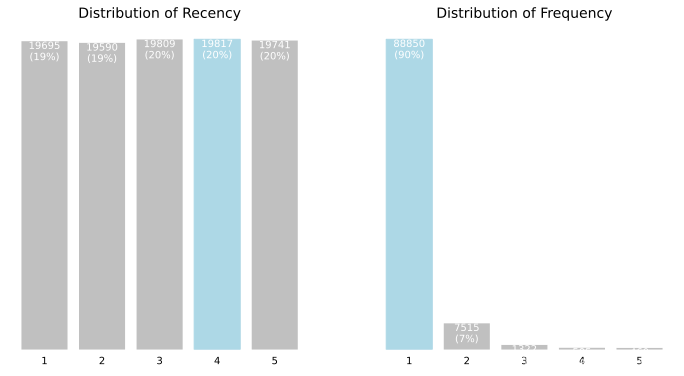

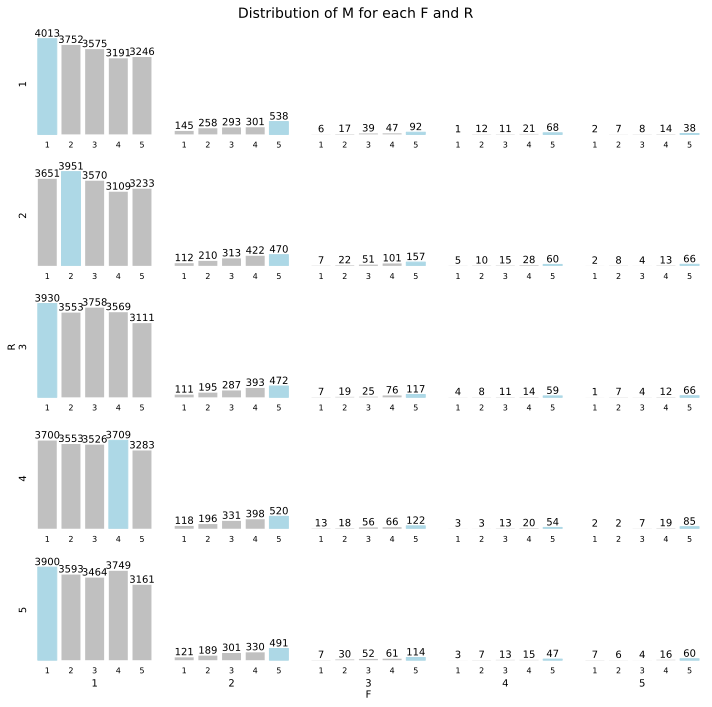

In [81]:
# визуализация распределения покупателей по значениям R и F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('lightblue')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# визуализация распределения M для RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('lightblue')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

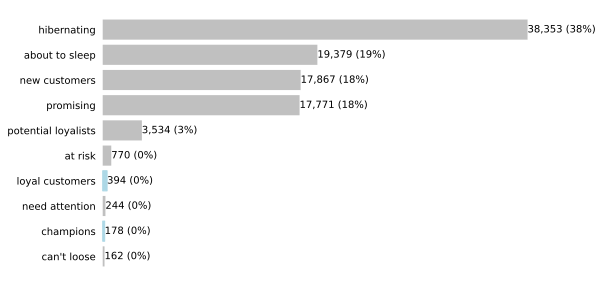

In [82]:
# расчет числа покупателей для каждого сегмента
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('lightblue')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

In [83]:
#Так как пользователи в большинстве являются разовыми покупателями,
# RFM анализ не дает достаточного представления о перспективах для данного массива данных')

<b> Уже из первого задания видно, что большинство пользователей совершили только одну покупку. Скорее всего исходные данные принадлжат продавцу, реализующему с, например бытовую технику, электронику, товары для ремонта, и т.д.

<b> Основная прибыль идет от покупателей входящих в 1 сегмент Frequency.

<b> Ни в 1, ни во втором сегментах Frequency нет значительных отличий между сегментами Recency, таким образом, с первого взгляда нет значимой корреляции между "давностью" покупки и прибылью.

<b> Покупатели с высокими показателями RF - Score составляют менее 1% от общего количества покупателей.
Для мотивации к повторным покупкам "лояльных" сегментов компании необходимо провести таргетированные рекламные акции.

<b> Так как основной объем продаж приходится на покупателей, совершающих только 1 покупку, возможно компании стоит сосредоточить маркетинговые затраты на "общих" рекламных предложениях, с целью увеличения "холодных" продаж.